#### Assignment

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
useducation_df.info()
useducation_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
useducation_df.isnull().sum()/useducation_df.isnull().count() 

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [7]:
useducation_df.update(useducation_df[['ENROLL','TOTAL_REVENUE', 'FEDERAL_REVENUE',
      'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
      'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE','GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
      'GRADES_1_8_G', 'GRADES_9_12_G','GRADES_PK_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 
      'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].fillna(useducation_df.mean()))

In [10]:
useducation_df.isnull().sum()
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


#### Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

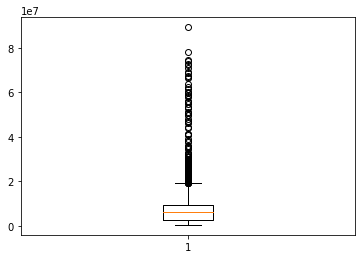

In [26]:
##Total Revenue
plt.boxplot(useducation_df['TOTAL_REVENUE'])
plt.show()

In [31]:
z_score= zscore(useducation_df['TOTAL_REVENUE'])

for threshold in range(1,5):
    print('The score threshold is: {}'.format(threshold))
    print('The indice of the outliers:', np.where(z_score > threshold))
    print('The number of outliers is: {}'.format(len((np.where(z_score>threshold)[0]))))

The score threshold is: 1
The indice of the outliers: (array([   4,   32,   56,   85,   96,  108,  137,  150,  161,  190,  201,
        213,  241,  252,  264,  292,  304,  316,  344,  355,  367,  396,
        407,  420,  449,  460,  472,  481,  501,  512,  524,  552,  564,
        576,  605,  616,  628,  633,  637,  654,  656,  662,  668,  680,
        685,  689,  706,  708,  714,  719,  731,  737,  741,  758,  760,
        763,  766,  771,  784,  789,  793,  802,  811,  813,  816,  819,
        824,  836,  842,  846,  855,  863,  865,  868,  871,  876,  891,
        897,  901,  919,  921,  924,  927,  932,  944,  950,  954,  971,
        973,  976,  979,  984,  997, 1002, 1006, 1023, 1025, 1028, 1031,
       1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285], dtype=int64),)
The number

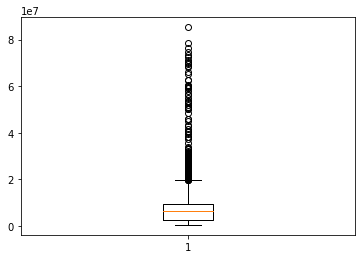

In [33]:
#Total Expenditure
plt.boxplot(useducation_df['TOTAL_EXPENDITURE'])
plt.show()

In [35]:
z_score= zscore(useducation_df['TOTAL_EXPENDITURE'])

for threshold in range(1,5):
    print('The score threshold is: {}'.format(threshold))
    print('The indice of the outliers:', np.where(z_score > threshold))
    print('The number of outliers is: {}'.format(len((np.where(z_score>threshold)[0]))))

The score threshold is: 1
The indice of the outliers: (array([   4,   32,   56,   85,  108,  137,  150,  161,  190,  213,  241,
        252,  264,  292,  304,  316,  344,  355,  367,  396,  407,  420,
        449,  460,  472,  481,  501,  512,  524,  533,  552,  564,  576,
        585,  605,  611,  616,  628,  633,  637,  654,  656,  662,  668,
        680,  685,  689,  698,  706,  708,  714,  719,  731,  737,  741,
        750,  758,  760,  763,  766,  771,  784,  789,  793,  811,  813,
        816,  819,  824,  836,  842,  846,  855,  863,  865,  868,  871,
        876,  891,  897,  901,  919,  921,  924,  927,  932,  944,  950,
        954,  971,  973,  976,  979,  984,  997, 1002, 1006, 1023, 1025,
       1028, 1031, 1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088,
       1101, 1106, 1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161,
       1178, 1180, 1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234,
       1237, 1242, 1254, 1259, 1263, 1280, 1282, 1285], dtype=int64),

#### If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

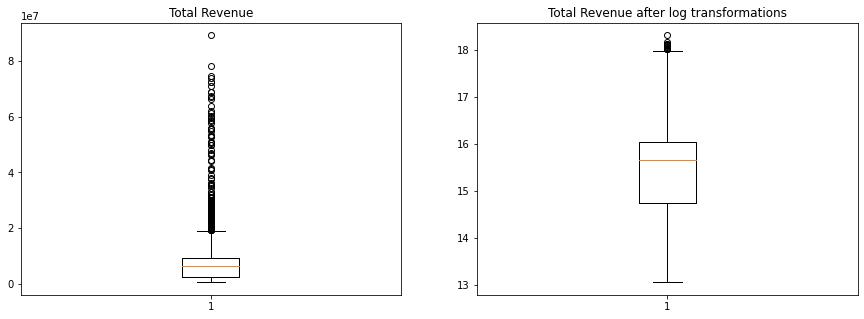

In [44]:
#Total Revenue
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation_df['TOTAL_REVENUE'])
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.boxplot(np.log(useducation_df['TOTAL_REVENUE']))
plt.title('Total Revenue after log transformations')
plt.show()

In [54]:
q75, q25 = np.percentile(np.log(useducation_df['TOTAL_REVENUE']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(useducation_df['TOTAL_REVENUE']) > max_val) 
                      | (np.log(useducation_df['TOTAL_REVENUE']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 69
The score threshold is: 1.5
Number of outliers is: 12
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [52]:
q75, q25 = np.percentile(np.log(useducation_df['TOTAL_EXPENDITURE']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(useducation_df['TOTAL_EXPENDITURE']) > max_val) 
                      | (np.log(useducation_df['TOTAL_EXPENDITURE']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 63
The score threshold is: 1.5
Number of outliers is: 12
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [70]:
win_total_revenue = winsorize(useducation_df["TOTAL_REVENUE"], (0, 0.05))
win_total_expenditure = winsorize(useducation_df["TOTAL_EXPENDITURE"], (0, 0.05))

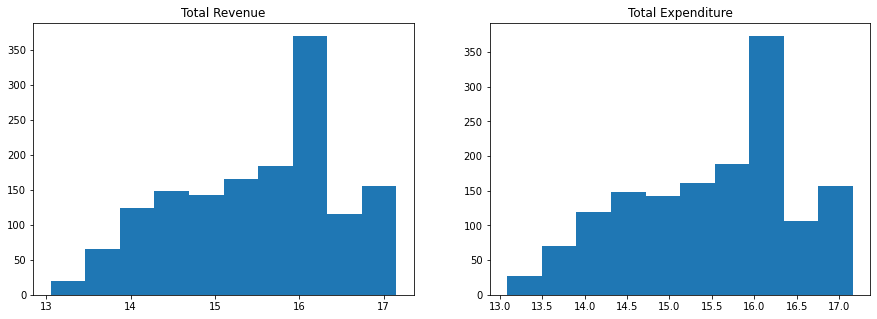

In [71]:
#Log transformation on both
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(np.log(win_total_revenue))
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.hist(np.log(win_total_expenditure))
plt.title('Total Expenditure')
plt.show()

#### Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


In [61]:
budget_deficit = useducation_df['TOTAL_EXPENDITURE'] - useducation_df['TOTAL_REVENUE']
budget_deficit

0       -25087.000000
1       -77103.000000
2       143501.000000
3        31063.000000
4       878807.000000
            ...      
1487    104599.010156
1488    104599.010156
1489    104599.010156
1490    104599.010156
1491    104599.010156
Length: 1492, dtype: float64

In [64]:
winsorize_budget_deficit = winsorize(budget_deficit, (.10, .10))

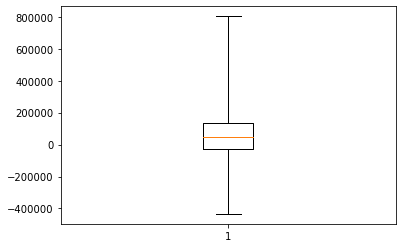

In [69]:
plt.boxplot(winsorize_budget_deficit, whis=10)
plt.show()

#### Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.


In [72]:
budget_2 = win_total_expenditure - win_total_revenue

{'whiskers': [<matplotlib.lines.Line2D at 0x28ba1982148>,
 'caps': [<matplotlib.lines.Line2D at 0x28ba2c40a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ba2666588>],
 'medians': [<matplotlib.lines.Line2D at 0x28bb1a405c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28bb1a409c8>],
 'means': []}

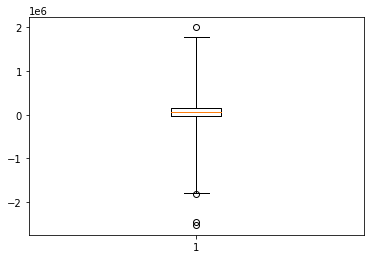

In [73]:
plt.boxplot(budget_2, whis=10)

#### Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [84]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget": winsorize_budget_deficit,
              "winsorized_budget2": budget_2}).describe()

,original_budget,winsorized_budget,winsorized_budget2
count,1.492000e+03,1492.000000,1.492000e+03
mean,1.045990e+05,78690.912301,6.740041e+04
std,5.310770e+05,266231.659733,3.233026e+05
min,-3.897129e+06,-433970.000000,-2.520706e+06
25%,-2.965425e+04,-29654.250000,-2.519575e+04
50%,4.849350e+04,48493.500000,5.455000e+04
75%,1.360070e+05,136007.000000,1.520745e+05
max,5.487742e+06,803208.000000,2.000618e+06


#### If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?